Image files and their shapes:
blue_yellow_rings_6_control2.png: (1386, 1386, 3)
grayscale_rings_6_control2.png: (1386, 1386, 3)
blue_yellow_rings_6_control.png: (1386, 1386, 3)
red_green_rings_6_snake_illusion.png: (1386, 1386, 3)
grayscale_rings_6_snake_illusion.png: (1386, 1386, 3)
grayscale_rings_6_control.png: (1386, 1386, 3)
white_control.png: (800, 800, 3)
yellow_control.png: (800, 800, 3)
blue_yellow_rings_6_snake_illusion.png: (1386, 1386, 3)
blue_control.png: (800, 800, 3)
red_green_rings_6_control2.png: (1386, 1386, 3)
red_control.png: (800, 800, 3)
green_control.png: (800, 800, 3)
red_green_rings_6_control.png: (1386, 1386, 3)
black_control.png: (800, 800, 3)


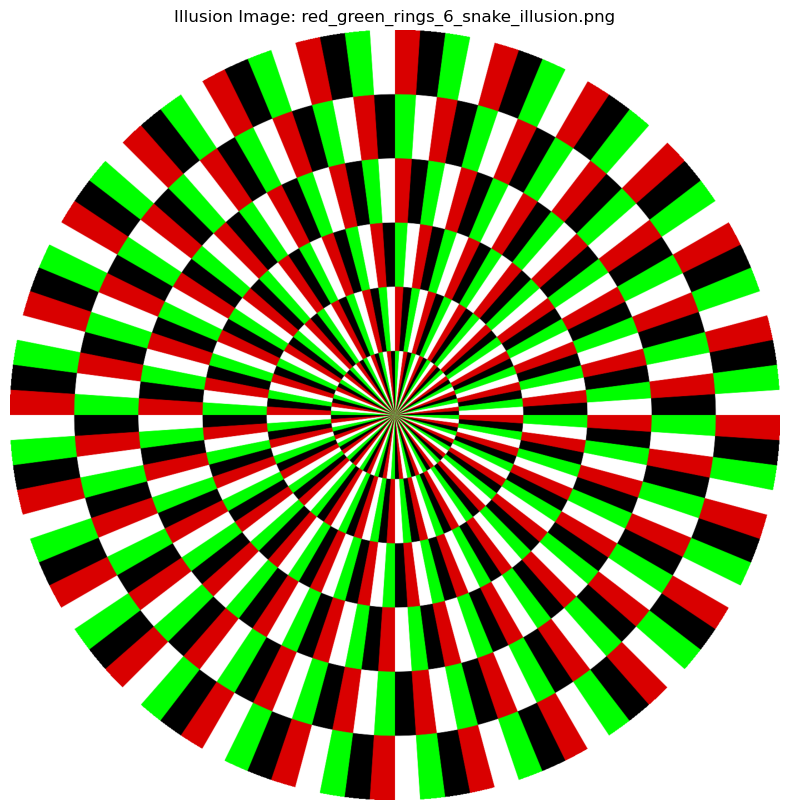

In [6]:

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Get list of all images in stimuli folder
stimuli_folder = '/engram/nklab/fc2803/IllusoryMotionStimuli/stimuli'
image_files = [f for f in os.listdir(stimuli_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Print image names and shapes
print("Image files and their shapes:")
for img_file in image_files:
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    print(f"{img_file}: {img.shape}")

# Find and visualize an illusion image
illusion_images = [f for f in image_files if 'illusion' in f.lower()]
if illusion_images:
    img_path = os.path.join(stimuli_folder, illusion_images[0])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(f'Illusion Image: {illusion_images[0]}')
    plt.axis('off')
    plt.show()
else:
    print("No images containing 'illusion' in their name were found.")


Filtered images and their shapes:
blue_yellow_rings_6_control2.png: (1386, 1386, 3)
grayscale_rings_6_control2.png: (1386, 1386, 3)
red_green_rings_6_snake_illusion.png: (1386, 1386, 3)
grayscale_rings_6_snake_illusion.png: (1386, 1386, 3)
blue_yellow_rings_6_snake_illusion.png: (1386, 1386, 3)
red_green_rings_6_control2.png: (1386, 1386, 3)


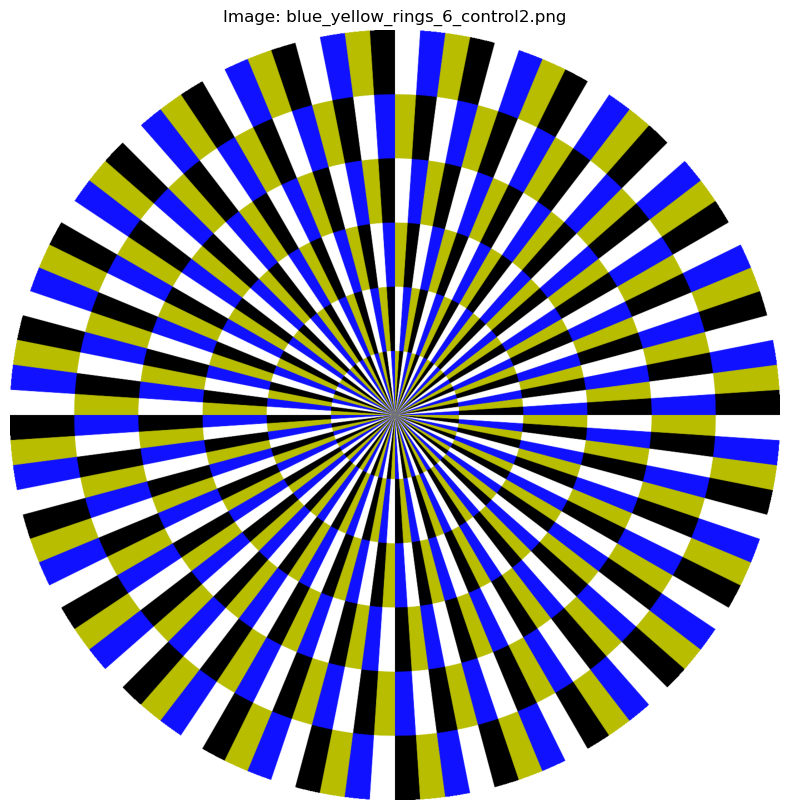

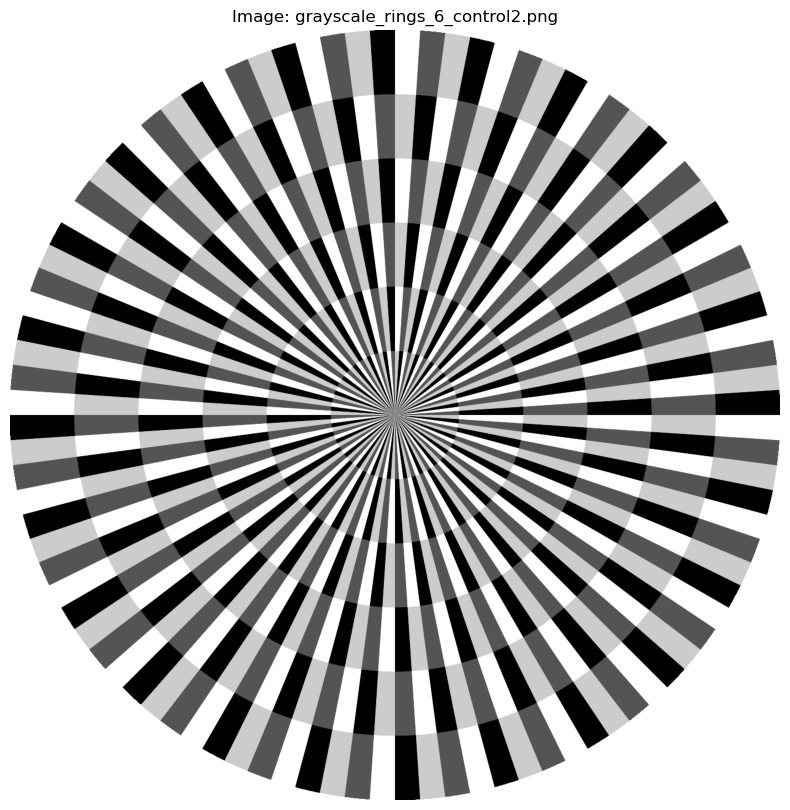

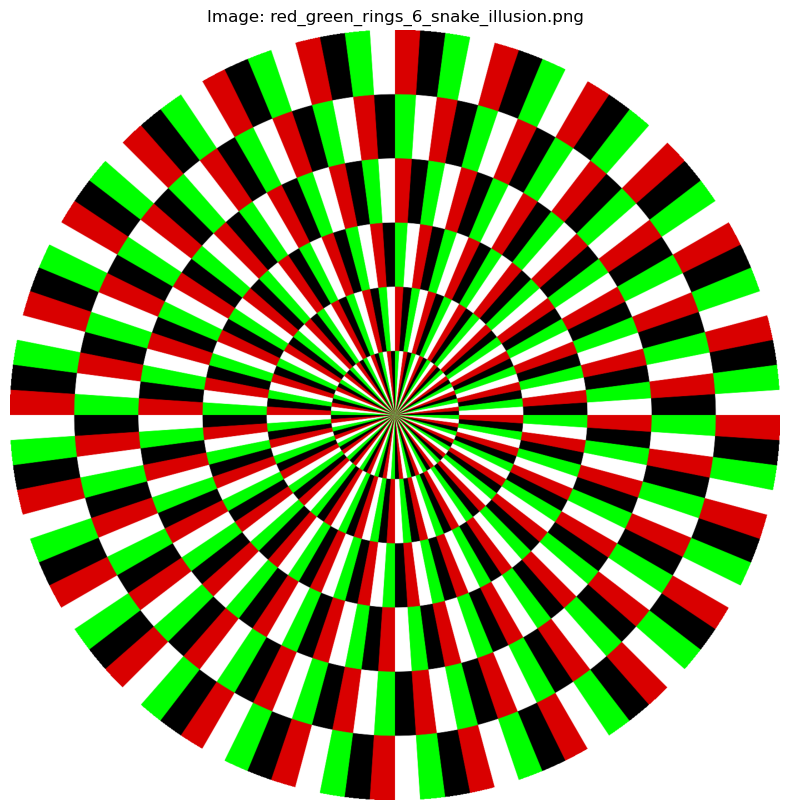

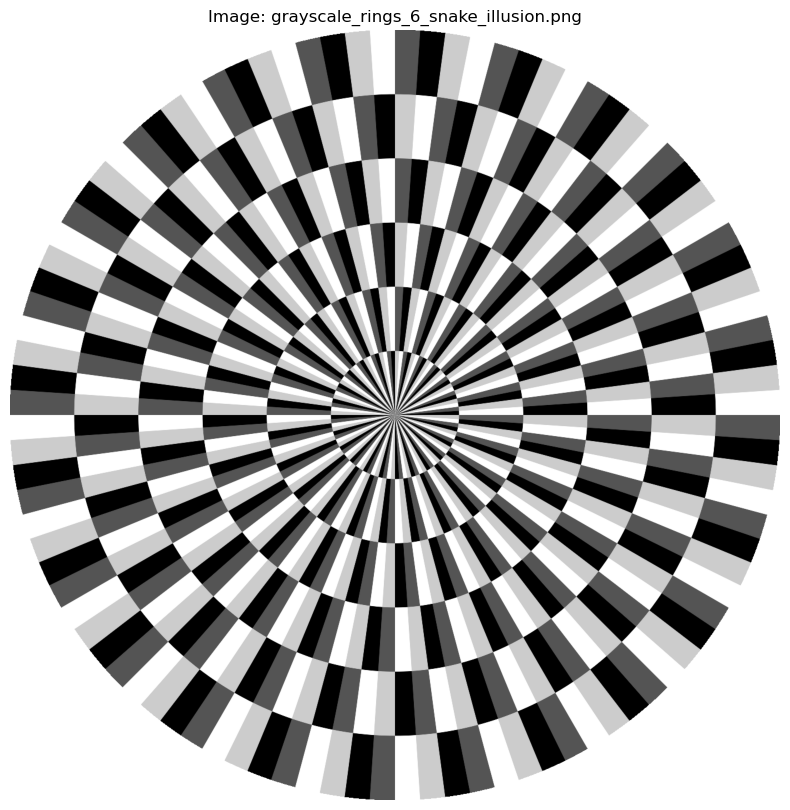

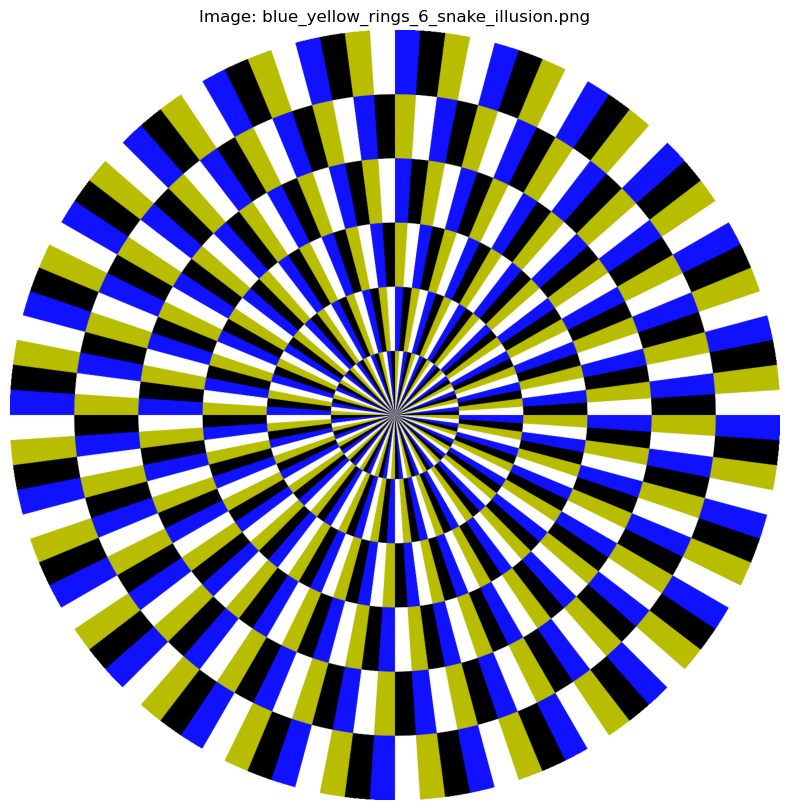

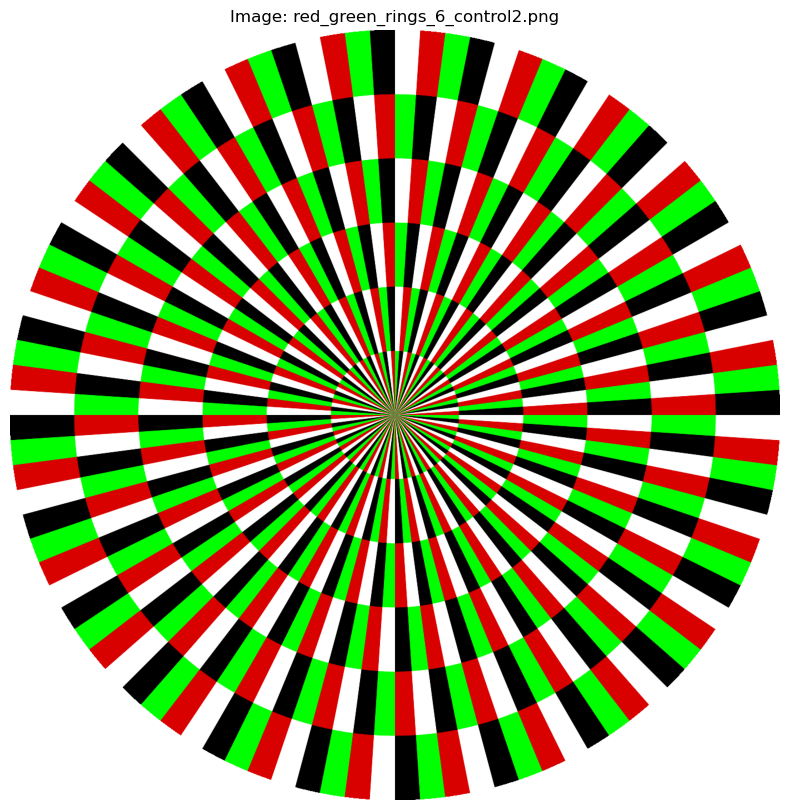

In [7]:

# Filter images to only include those with "illusion" or "control2" in their names
filtered_images = [f for f in image_files if 'illusion' in f.lower() or 'control2' in f.lower()]

# Print filtered image names and shapes
print("\nFiltered images and their shapes:")
for img_file in filtered_images:
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    print(f"{img_file}: {img.shape}")

# Visualize the filtered images
for img_file in filtered_images:
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(f'Image: {img_file}')
    plt.axis('off')
    plt.show()


In [27]:
# Create 11_frame directory
sim_blink_dir = os.path.join(stimuli_folder, 'sim_blink')
frame_dir = os.path.join(sim_blink_dir, '16_frame')
os.makedirs(frame_dir, exist_ok=True)

# Create blank white image 
blank_img = np.ones((1386, 1386, 3), dtype=np.uint8) * 255

# Process each filtered image
for img_file in filtered_images:
    # Create folder for this image
    img_folder = os.path.join(frame_dir, os.path.splitext(img_file)[0])
    os.makedirs(img_folder, exist_ok=True)
    
    # Save blank frames for frame_1 to frame_3
    for i in range(1, 5):
        blank_path = os.path.join(img_folder, f'frame_{i}.png')
        cv2.imwrite(blank_path, blank_img)
    
    # Save original image for frame_4 to frame_11
    img_path = os.path.join(stimuli_folder, img_file)
    for i in range(5, 17):
        frame_path = os.path.join(img_folder, f'frame_{i}.png')
        shutil.copy2(img_path, frame_path)
    
    print(f"Created frames for {img_file} in {img_folder}")

Created frames for blue_yellow_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/blue_yellow_rings_6_control2
Created frames for grayscale_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/grayscale_rings_6_control2
Created frames for red_green_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/red_green_rings_6_snake_illusion
Created frames for grayscale_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/grayscale_rings_6_snake_illusion
Created frames for blue_yellow_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/blue_yellow_rings_6_snake_illusion
Created frames for red_green_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink/16_frame/red_green_rings_6_control2


In [17]:
sim_blink_dir

'/engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery'

In [28]:
# Create base directory for simulation
sim_microsaccade_dir = os.path.join(stimuli_folder, 'sim_microsaccade')
os.makedirs(sim_microsaccade_dir, exist_ok=True)

# Create 2_frame directory
frame_dir = os.path.join(sim_microsaccade_dir, '16_frame')
os.makedirs(frame_dir, exist_ok=True)

# Create blank white image with bigger size
blank_img = np.ones((1386+60, 1386+60, 3), dtype=np.uint8) * 255  # 200 pixels bigger than original
# Process each filtered image
for img_file in filtered_images:
    # Create folder for this image
    img_folder = os.path.join(frame_dir, os.path.splitext(img_file)[0])
    os.makedirs(img_folder, exist_ok=True)
    
    # Load original image
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    
    # Create frames 1-3 - original position
    for i in range(1, 5):
        frame = blank_img.copy()
        frame[0:1386, 0:1386] = img  # Original position
        frame_path = os.path.join(img_folder, f'frame_{i}.png')
        cv2.imwrite(frame_path, frame)
    
    # Create frames 4-11 - shifted position
    for i in range(5, 17):
        frame = blank_img.copy()
        frame[60:1446, 60:1446] = img  # Shift diagonally by 60 pixels
        frame_path = os.path.join(img_folder, f'frame_{i}.png')
        cv2.imwrite(frame_path, frame)
    
    print(f"Created frames for {img_file} in {img_folder}")


Created frames for blue_yellow_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/blue_yellow_rings_6_control2
Created frames for grayscale_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/grayscale_rings_6_control2
Created frames for red_green_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/red_green_rings_6_snake_illusion
Created frames for grayscale_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/grayscale_rings_6_snake_illusion
Created frames for blue_yellow_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/blue_yellow_rings_6_snake_illusion
Created frames for red_green_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade/16_frame/red_green_rings_6_control2


In [29]:
import shutil
# Create base directory for simulation
sim_blink_dir = os.path.join(stimuli_folder, 'sim_blink_periphery')
os.makedirs(sim_blink_dir, exist_ok=True)

# Create 2_frame directory
frame_dir = os.path.join(sim_blink_dir, '16_frame')
os.makedirs(frame_dir, exist_ok=True)

# Create blank white image 3 times larger
blank_img = np.ones((1386*2, 1386*2, 3), dtype=np.uint8) * 255

# Process each filtered image
for img_file in filtered_images:
    # Create folder for this image
    img_folder = os.path.join(frame_dir, os.path.splitext(img_file)[0])
    os.makedirs(img_folder, exist_ok=True)
    
    # Load original image
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    
    # Create first 3 frames as blank
    for i in range(1, 5):
        frame = blank_img.copy()
        frame_path = os.path.join(img_folder, f'frame_{i}.png')
        cv2.imwrite(frame_path, frame)
    
    # Create frames 4-11 with original image
    for i in range(5, 17):
        frame = blank_img.copy()
        frame[0:1386, 0:1386] = img  # Original position
        frame_path = os.path.join(img_folder, f'frame_{i}.png')
        cv2.imwrite(frame_path, frame)
    
    print(f"Created frames for {img_file} in {img_folder}")

Created frames for blue_yellow_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/blue_yellow_rings_6_control2
Created frames for grayscale_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/grayscale_rings_6_control2
Created frames for red_green_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/red_green_rings_6_snake_illusion
Created frames for grayscale_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/grayscale_rings_6_snake_illusion
Created frames for blue_yellow_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/blue_yellow_rings_6_snake_illusion
Created frames for red_green_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_blink_periphery/16_frame/red_green_rings_6_contr

In [30]:
# Create base directory for simulation
sim_microsaccade_dir = os.path.join(stimuli_folder, 'sim_microsaccade_periphery')
os.makedirs(sim_microsaccade_dir, exist_ok=True)

# Create 2_frame directory
frame_dir = os.path.join(sim_microsaccade_dir, '16_frame')
os.makedirs(frame_dir, exist_ok=True)

# Create blank white image with bigger size
blank_img = np.ones((1386*2, 1386*2, 3), dtype=np.uint8) * 255  # 200 pixels bigger than original

# Process each filtered image
for img_file in filtered_images:
    # Create folder for this image
    img_folder = os.path.join(frame_dir, os.path.splitext(img_file)[0])
    os.makedirs(img_folder, exist_ok=True)
    
    # Load original image
    img_path = os.path.join(stimuli_folder, img_file)
    img = cv2.imread(img_path)
    
    # Create frames 1-3 in original position
    for frame_num in range(1, 5):
        frame = blank_img.copy()
        frame[0:1386, 0:1386] = img  # Original position
        frame_path = os.path.join(img_folder, f'frame_{frame_num}.png')
        cv2.imwrite(frame_path, frame)
    
    # Create frames 4-11 in shifted position
    for frame_num in range(5, 17):
        frame = blank_img.copy()
        frame[60:1446, 60:1446] = img  # Shifted position
        frame_path = os.path.join(img_folder, f'frame_{frame_num}.png')
        cv2.imwrite(frame_path, frame)
    
    print(f"Created frames for {img_file} in {img_folder}")

Created frames for blue_yellow_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_periphery/16_frame/blue_yellow_rings_6_control2
Created frames for grayscale_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_periphery/16_frame/grayscale_rings_6_control2
Created frames for red_green_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_periphery/16_frame/red_green_rings_6_snake_illusion
Created frames for grayscale_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_periphery/16_frame/grayscale_rings_6_snake_illusion
Created frames for blue_yellow_rings_6_snake_illusion.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_periphery/16_frame/blue_yellow_rings_6_snake_illusion
Created frames for red_green_rings_6_control2.png in /engram/nklab/fc2803/IllusoryMotionStimuli/stimuli/sim_microsaccade_